# py-pde Documentation
## Chapter 2
### 2.1 Plotting a vector field
This example shows how to initialize and visualize the vector field $\mathbf{u}=\left(sin(x), cos(x)\right)$.

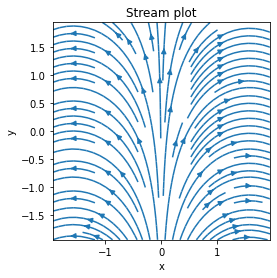

In [1]:
from pde import CartesianGrid, VectorField

grid = CartesianGrid([[-2, 2], [-2, 2]], 32)
field = VectorField.from_expression(grid, ["sin(x)", "cos(x)"])
field.plot(method="streamplot", title="Stream plot")

### 2.2 Solving Laplace's equation in 2d
This example shows how to solve a 2d Laplace equation with spatially varying boundary conditions.

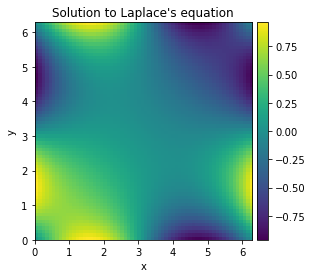

In [2]:
import numpy as np
from pde import CartesianGrid, solve_laplace_equation

grid = CartesianGrid([[0, 2 * np.pi]] * 2, 64)
bcs = [{"value": "sin(y)"}, {"value": "sin(x)"}]
res = solve_laplace_equation(grid, bcs)
res.plot()

### 2.3 Plotting a scalar field in cylindrical coordinates

This example shows how to initialize and visualize the scalar field $u=\sqrt{z}\exp(-r^2)$ in cylindrical coordinates.

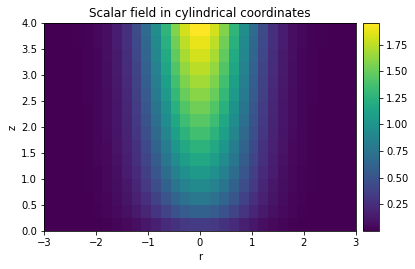

In [3]:
from pde import CylindricalGrid, ScalarField

grid = CylindricalGrid(radius=3, bounds_z=[0, 4], shape=16)
field = ScalarField.from_expression(grid, "sqrt(z) * exp(-r**2)")
field.plot(title="Scalar field in cylindrical coordinates")

### 2.4 Solving Poisson’s equation in 1d
This example shows how to solve a 1d Poisson equation with boundary conditions.

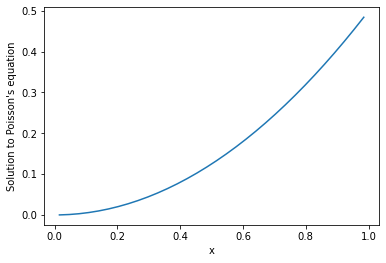

In [4]:
from pde import CartesianGrid, ScalarField, solve_poisson_equation

grid = CartesianGrid([[0, 1]], 32, periodic=False)
field = ScalarField(grid, 1)
result = solve_poisson_equation(field, bc=[{"value": 0}, {"derivative": 1}])
result.plot()

### 2.5 Simple diffusion equation
This example solves a simple diffusion equation in two dimensions.

100%|██████████| 10.0/10.0 [00:01<00:00,  5.52it/s]


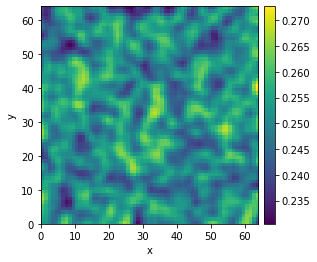

In [6]:
from pde import DiffusionPDE, ScalarField, UnitGrid

grid = UnitGrid([64, 64]) # generate grid
state = ScalarField.random_uniform(grid, 0.2, 0.3) # generate initial condition
eq = DiffusionPDE(diffusivity=0.1) # define the pde
result = eq.solve(state, t_range=10)
result.plot()

### 2.6 Kuramoto-Sivashinsky - Using PDE class
This example implements a scalar PDE using the ```PDE```. We here consider the Kuramoto–Sivashinsky equation, which for instance describes the dynamics of flame fronts:
$$
\partial_{t}{u}=-\frac{1}{2}|\nabla u|^2-\nabla^2u-\nabla^4u
$$

100%|██████████| 10.0/10.0 [00:04<00:00,  2.25it/s]


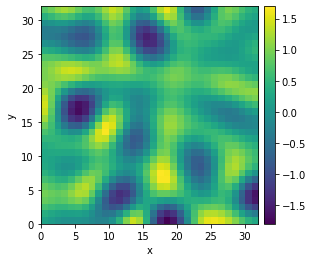

In [7]:
from pde import PDE, ScalarField, UnitGrid

grid = UnitGrid([32, 32]) # generate grid
state = ScalarField.random_uniform(grid) # generate initial condition
eq = PDE({"u": "-gradient_squared(u) / 2 - laplace(u + laplace(u))"}) # define the pde 
result = eq.solve(state, t_range=10, dt=0.01)
result.plot()

### 2.7 Spherically symmetric PDE
This example illustrates how to solve a PDE in a spherically symmetric geometry.

100%|██████████| 0.1/0.1 [00:01<00:00, 12.56s/it]


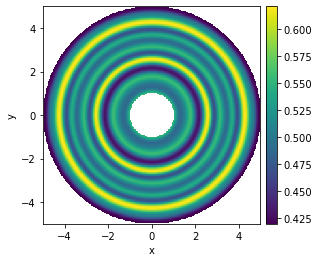

In [8]:
from pde import DiffusionPDE, ScalarField, SphericalGrid

grid = SphericalGrid(radius=[1, 5], shape=128) # generate grid
state = ScalarField.random_uniform(grid) # generate initial condition

eq = DiffusionPDE(0.1) # define the PDE
result = eq.solve(state, t_range=0.1, dt=0.001)
result.plot(kind="image")

### 2.8 Diffusion on a Cartesian grid
This example shows how to solve the diffusion equation on a Cartesian grid.

100%|██████████| 1.0/1.0 [00:02<00:00,  2.23s/it]


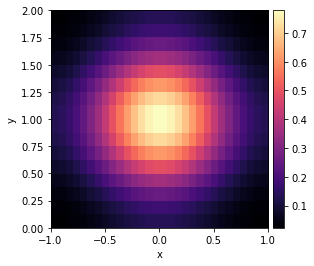

In [9]:
from pde import CartesianGrid, DiffusionPDE, ScalarField

grid = CartesianGrid([[-1, 1], [0, 2]], [30, 16]) # generate grid
state = ScalarField(grid) # generate initial condition
state.add_interpolated([0, 1], 1)

eq = DiffusionPDE(0.1) # define the pde
result = eq.solve(state, t_range=1, dt=0.01)
result.plot(cmap="magma")

### 2.9 Stochastic simulation
This example illustrates how a stochastic simulation can be done.

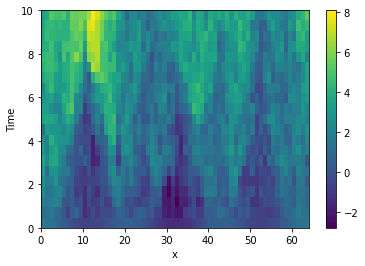

In [11]:
from pde import KPZInterfacePDE, MemoryStorage, ScalarField, UnitGrid, plot_kymograph

grid = UnitGrid([64]) # generate grid
state = ScalarField.random_harmonic(grid) # generate initial condition

eq = KPZInterfacePDE(noise=1) # define the SDE
storage = MemoryStorage()
eq.solve(state, t_range=10, dt=0.01, tracker=storage.tracker(0.5))
plot_kymograph(storage)

### 2.10 Setting boundary conditions
This example shows how different boundary conditions can be specified.

100%|██████████| 10.0/10.0 [00:02<00:00,  4.93it/s]


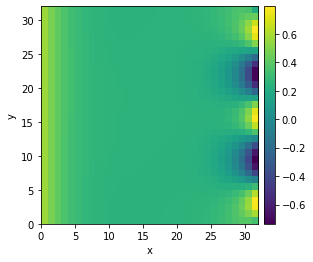

In [12]:
from pde import DiffusionPDE, ScalarField, UnitGrid

grid = UnitGrid([32, 32], periodic=[False, True]) # generate grid
state = ScalarField.random_uniform(grid, 0.2, 0.3) # generate initial condition

# set boundary conditions `bc` for all axes
bc_x_left = {"derivative": 0.1}
bc_x_right = {"value": "sin(y / 2)"}
bc_x = [bc_x_left, bc_x_right]
bc_y = "periodic"
eq = DiffusionPDE(bc=[bc_x, bc_y])

result = eq.solve(state, t_range=10, dt=0.005)
result.plot()

### 2.11 1D problem - Using _PDE_ class
This example implements a PDE that is only defined in one dimension. Here, we chose the ```Korteweg-de Vries equation```, given by
$$
\partial_t\phi=6\phi\partial_x\phi-\partial^3_x\phi
$$
which we implement using the _```PDE```_.

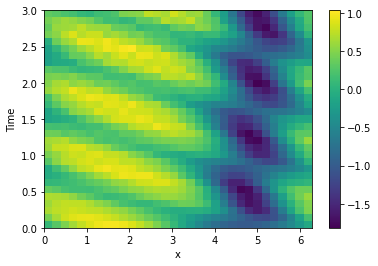

In [13]:
from math import pi
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, plot_kymograph

# initialize the equation and the space
eq = PDE(
    {"φ": "6 * φ * get_x(gradient(φ)) - laplace(get_x(gradient(φ)))"}, user_funcs={"get_x":
    lambda arr: arr[0]},
)
grid = CartesianGrid([[0, 2 * pi]], [32], periodic=True)
state = ScalarField.from_expression(grid, "sin(x)")

# solve the equation and store the trajectory
storage = MemoryStorage()
eq.solve(state, t_range=3, tracker=storage.tracker(0.1))

# plot the trajectory as a space-time plot
plot_kymograph(storage)

### 2.12 Brusselator - Using the _PDE_ class
This example uses the _```PDE```_ class to implement the Brusselator with spatial coupling,
$$
\begin{aligned}
\partial_t{u} &= D_0\nabla^2u+a-(1+b)u+vu^2\\
\partial_t{v} &= D_1\nabla^2v+bu-vu^2
\end{aligned}
$$
Here, $D_0$ and $D_1$ are the respective diffusivity and the parameters $a$ and $b$ are related to reaction rates.

Note that the same result can also be achieved with a full implementation of a custom class, which allows for more flexibility at the cost of code complexity.